### Import Libraries

In [1]:
import pandas as pd
import numpy as mp
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

### Load in Test and Validation Datasets

In [2]:
## Load in Test Set
X_test_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/test/X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/test/y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc auc calculation

## Load in Validation Set
X_val_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/validation/X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/validation/y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

y_train_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/training/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

### Create function for Basic Logistic Regression

Uses sklearn

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [9]:
def log_reg(x_train, y_train, x_val, y_val, x_test, y_test, variable):

    ## fit logistic regression on training data
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)

    ## predicting validation set result and calculating accuracy
    y_val_pred = logreg.predict(x_val)
    print('Accuracy of logistic regression classifier on validation set using {}: {:.2f}'.format(variable, logreg.score(x_val, y_val)))

    ## predicting test set result and calculating accuracy
    y_test_pred = logreg.predict(x_test)
    print('Accuracy of logistic regression classifier on test set using {}: {:.2f}'.format(variable, logreg.score(x_test, y_test)))

    ## define metrics for roc
    y_test_pred_proba = logreg.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    logreg_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    ## create roc curve   
    plt.figure()
    plt.plot(fpr, tpr, label = 'Logistic Regression Classifier (area = %0.2f)' % logreg_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

    ## define metric for precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
    auc_precision_recall = auc(recall, precision)

    ## create pr curve   
    plt.figure()
    plt.plot(recall, precision, label = 'Logistic Regression Classifier (area = %0.2f)' % auc_precision_recall)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall')
    plt.legend(loc = "lower right")
    plt.show()

# Modelling on 25th Quantile

In [11]:
## define columns to drop
cols_to_drop_25 = ['dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean',
                'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_50', 'mean_0_75', 'mean_0_mean',
                'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean']

## dropping columns from X_validation set
X_val_25 = X_val.drop(columns = cols_to_drop_25, axis = 1)

## dropping columns from X_test set
X_test_25 = X_test.drop(columns = cols_to_drop_25, axis = 1)

## Load X_train_25
X_train_25_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/training/X_train_25.parquet" ## to edit file path
X_train_25 = pd.read_parquet(X_train_25_path)

In [7]:
print(f"Number of Rows for X_train_25 and y_train: {len(X_train_25)}, {len(y_train)}")
print(f"Number of Rows for X_test_25 and y_test: {len(X_test_25)}, {len(y_test)}")
print(f"Number of Rows for X_val_25 and y_val: {len(X_val_25)}, {len(y_val)}")

Number of Rows for X_train_25 and y_train: 51567, 51567
Number of Rows for X_val_25 and y_val: 17434, 17434
Number of Rows for X_test_25 and y_test: 16275, 16275


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of logistic regression classifier on validation set using 25th quantile: 0.93
Accuracy of logistic regression classifier on test set using 25th quantile: 0.94


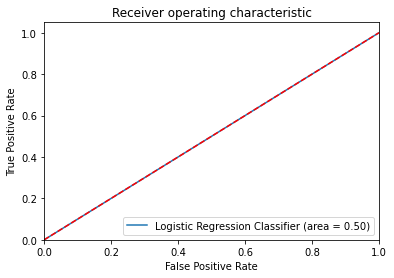

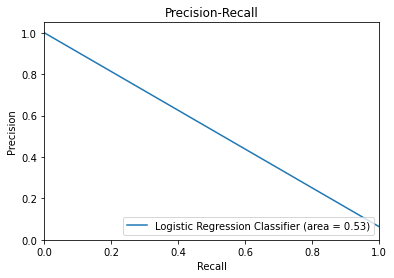

In [10]:
log_reg(X_train_25, y_train, X_val_25, y_val, X_test_25, y_test, "25th quantile")

# Modelling on 50th Quantile

In [ ]:
## define columns to drop
cols_to_drop_50 = ['dwelling_time_-1_25', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_25', 'std_-1_75', 'std_-1_mean', 'mean_-1_25', 'mean_-1_75', 'mean_-1_mean',
                'dwelling_time_0_25', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_25', 'std_0_75', 'std_0_mean', 'mean_0_25', 'mean_0_75', 'mean_0_mean',
                'dwelling_time_+1_25', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_25', 'std_+1_75', 'std_+1_mean', 'mean_+1_25', 'mean_+1_75', 'mean_+1_mean']

## dropping columns from X_validation set
X_val_50 = X_val.drop(columns = cols_to_drop_50, axis = 1)

## dropping columns from X_test set
X_test_50 = X_test.drop(columns = cols_to_drop_50, axis = 1)

## Load X_train_50
X_train_50_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/training/X_train_50.parquet" ## to edit file path
X_train_50 = pd.read_parquet(X_train_50_path)

In [14]:
## check if training data are the same len
print(f"Number of Rows for X_train_50 and y_train: {len(X_train_50)}, {len(y_train)}")

## check if validation data are the same len
print(f"Number of Rows for X_val_50 and y_val: {len(X_val_50)}, {len(y_val)}")

## check if test data are the same len
print(f"Number of Rows for X_test_50 and y_test: {len(X_test_50)}, {len(y_test)}")

Number of Rows for X_train_50 and y_train: 51567, 51567
Number of Rows for X_val_50 and y_val: 17434, 17434
Number of Rows for X_test_50 and y_test: 16275, 16275


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of logistic regression classifier on validation set using 50th quantile: 0.93
Accuracy of logistic regression classifier on test set using 50th quantile: 0.94


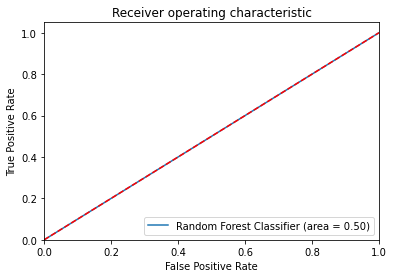

In [15]:
log_reg(X_train_50, y_train, X_val_50, y_val, X_test_50, y_test, "50th quantile")

# Modelling on 75th Quantile

In [ ]:
## define columns to drop
cols_to_drop_75 = ['dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_mean', 'std_-1_25', 'std_-1_50', 'std_-1_mean', 'mean_-1_25', 'mean_-1_50', 'mean_-1_mean',
                    'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_mean', 'std_0_25', 'std_0_50', 'std_0_mean', 'mean_0_25', 'mean_0_50', 'mean_0_mean',
                    'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_mean', 'std_+1_25', 'std_+1_50', 'std_+1_mean', 'mean_+1_25', 'mean_+1_50', 'mean_+1_mean']

## dropping columns from X_validation set
X_val_75 = X_val.drop(columns = cols_to_drop_75, axis = 1)

## dropping columns from X_test set
X_test_75 = X_test.drop(columns = cols_to_drop_75, axis = 1)

## Load X_train_75
X_train_75_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/training/X_train_75.parquet" ## to edit file path
X_train_75 = pd.read_parquet(X_train_75_path)

In [17]:
## check if training data are the same len
print(f"Number of Rows for X_train_75 and y_train: {len(X_train_75)}, {len(y_train)}")

## check if validation data are the same len
print(f"Number of Rows for X_val_75 and y_val: {len(X_val_75)}, {len(y_val)}")

## check if test data are the same len
print(f"Number of Rows for X_test_75 and y_test: {len(X_test_75)}, {len(y_test)}")

Number of Rows for X_train_75 and y_train: 51567, 51567
Number of Rows for X_val_75 and y_val: 17434, 17434
Number of Rows for X_test_75 and y_test: 16275, 16275


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of logistic regression classifier on validation set using 75th quantile: 0.93
Accuracy of logistic regression classifier on test set using 75th quantile: 0.94


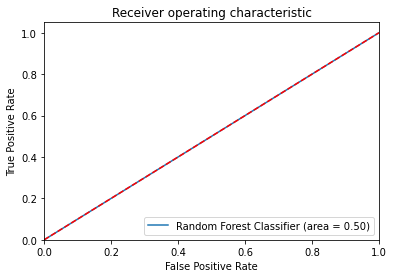

In [18]:
log_reg(X_train_75, y_train, X_val_75, y_val, X_test_75, y_test, "75th quantile")

# Modelling on Mean

In [ ]:
## define columns to drop
cols_to_drop_mean = ['dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 'std_-1_25', 'std_-1_50', 'std_-1_75', 'mean_-1_25', 'mean_-1_50', 'mean_-1_75',
                    'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'std_0_25', 'std_0_50', 'std_0_75', 'mean_0_25', 'mean_0_50', 'mean_0_75',
                    'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 'std_+1_25', 'std_+1_50', 'std_+1_75', 'mean_+1_25', 'mean_+1_50', 'mean_+1_75']

## dropping columns from X_validation set
X_val_mean = X_val.drop(columns = cols_to_drop_mean, axis = 1)

## dropping columns from X_test set
X_test_mean = X_test.drop(columns = cols_to_drop_mean, axis = 1)

## Load X_train_mean
X_train_mean_path = "/Users/claudia/DSA4262-ACMXZ/data/new_preprocessed_data/training/X_train_mean.parquet" ## to edit file path
X_train_mean = pd.read_parquet(X_train_mean_path)

In [20]:
## check if training data are the same len
print(f"Number of Rows for X_train_mean and y_train: {len(X_train_mean)}, {len(y_train)}")

## check if validation data are the same len
print(f"Number of Rows for X_val_mean and y_val: {len(X_val_mean)}, {len(y_val)}")

## check if test data are the same len
print(f"Number of Rows for X_test_mean and y_test: {len(X_test_mean)}, {len(y_test)}")

Number of Rows for X_train_mean and y_train: 51567, 51567
Number of Rows for X_val_mean and y_val: 17434, 17434
Number of Rows for X_test_mean and y_test: 16275, 16275


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of logistic regression classifier on validation set using mean: 0.93
Accuracy of logistic regression classifier on test set using mean: 0.94


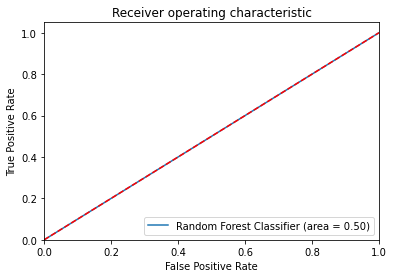

In [21]:
log_reg(X_train_mean, y_train, X_val_mean, y_val, X_test_mean, y_test, "mean")

### Methods to improve accuracy

clustering certain variables

https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604

In [ ]:
### clustering

from sklearn.cluster import KMeans

## features that we want to consider when clustering
features = [] 

## fitting the cluster
kmeans = KMeans(n_cluster = 2) ## can edit the number of clusters
kmeans.fit(data[features])

## create a new column in data df to tell us which cluster it belongs to
data['cluster'] = kmeans.predict(data[features]) 

### Re-fit the Model

In [ ]:
## to define the variables used for prediction (X) and the result (y)

X = data[] 
y = data[] 

## split data into test and training set

X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X, y, 
                                    test_size = 0.3, ## proportion of dataset to be used as test 
                                    random_state = 0) ## for reproducibility

In [ ]:
## fitting the model

logreg_cluster = LogisticRegression()
logreg_cluster.fit(X_train_cluster, y_train_cluster)

In [ ]:
## predicting test set result and calculating accuracy

y_pred_cluster = logreg_cluster.predict(X_test_cluster)
print('Accuracy of logistic regression classifier with clustering on test set: {:.2f}'.format(logreg_cluster.score(X_test_cluster, y_test_cluster)))

In [ ]:
## printing confusion matrix

confusion_matrix_cluster = confusion_matrix(y_test_cluster, y_pred_cluster)
print(confusion_matrix_cluster)

In [ ]:
## roc curve

logit_roc_auc_cluster = roc_auc_score(y_test_cluster, y_pred_cluster)

## fpr = false positive rate
## tpr = true positive rate
fpr_cluster, tpr_cluster, thresholds_cluster = roc_curve(y_test_cluster, logreg_cluster.predict_proba(X_test_cluster)[:,1])
plt.rc("font", size = 14)
plt.figure()
plt.plot(fpr_cluster, tpr_cluster, label = 'Logistic Regression Cluster (area = %0.2f)' % logit_roc_auc_cluster)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate with Clustering')
plt.ylabel('True Positive Rate with Clustering')
plt.title('Receiver operating characteristic with Clustering')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()